# Are we spending more on transportation lately? Yes, but are we moving more?
## Mobility expenditure in Spain Exploration

This  notebook tries to solve questions that could indicate changes in household mobility expenditures in the last years. The main hypothesis is that those changes (if any) are promoted by new mobility trends. Questions are analysed by exploring the datasets of the Spanish household expenditure survey.

## Table of Contents
<ol>
<li><a href="#business">Business Understanding</a></li>
<li><a href="#dataunderstanding">Data Understanding</a></li>
<li><a href="#datapreparation"> Data Preparation</a>
    <ol>
        <li><a href="#datawrangling"> Data Wrangling</a></li>
            <ul>
                <li><a href="#gath">Gathering</a></li>
                <li><a href="#asse">Assessing</a></li>
                <li><a href="#clea">Cleaning</a></li>
            </ul> 
        <li><a href="#eda"> Data Analysis</a></li>
        </li>
    </ol> 
<li><a href="#result">Result Evaluation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Refere">References</a></li>    
</ol>

<a id='business'></a>
## 1. Business Understanding

### Goals
For this case study, the primary goal is to check the economic impact of new mobility trends on the transportation expenditures of Spanish people. From the wide array of mobility trends rising nowadays the ones considered in the study are Micromobility and shared mobility. 
The impact these new trends have on transportation expenditures will be assessed by answering the following questions:
1. _Are we spending less on transportation lately?_
    1.1 How have our transportation expenditures changed in the last 5 years?
2. _Are we spending more on private cars (purchase and use)?_  
** Have there been significant changes in private car ownership and usage in the last five years?**  
    2.1 Exploration of private car purchases.  
    2.2 Exploration of traditional fuel and alternative fuels spendings.   
    2.3 Driving licences and private vehicle circulatory tax spendings.
    2.4 Has the share on incompe spent on owning and runing motor vehicles changed over the years?
3. _Are Personal Mobility Vehicles purchases (kickscooters, bikes, etc.) on a rise?_
    3.1 Exploration of personal mobility vehicles purchases.  
3. _Are combined public transportation tickets and shared options on the rise?_    
    3.1 Exploration of public transportation individual and combined tickets  
    3.2 Exploratin of shared mobility options expenditures
4. What variables correlate well with car-oriented mobility?
5. Are new mobility trends allowing us to spend less?

<a id='dataunderstanding'></a>
## 2. Data Understanding

### Data collection

These questions require to know how much of the household spendings are destinated to transportation. Also within the transportation expenses it would be interesting to know what are the transportation means employed.  
  
Household budget surveys are widely spread datasets collected by many countries. They focus on households expenditures and provide a picture of living conditions of a given country.(cita eurostat hbs). These surveys could be useful to answer the questions of interest.
  
From the wide variety of countries providing these datasets, the ones from Spain were selected to be analyzed.  
  
Data from the spanish household expenditure survey was downloaded from the National Statistics Institute. Survey results are divided in three files. The first one includes the expenditures of all families, the second describes the household and the third one provides details related to the members of the household. This study will make use of the first two.

  
As mentioned in earlier sections the mobility trends considered for this study are micromobility and shared mobility. These are mainly presnent in Urban settings and not all urban settings of Spain have acces to them. There are also suburban and rural mobility trends, but these are more scarse and have less data available (to our knowledge/references) for that reason they are not included. Noting that, only Spanish cities with micromobiilty and shared mobility players will be considerd in the study and the rest will not. From the research carried out checking the existence of shared and micromobility options (referencias fluctio numo, uber etc.) The Autonomous communities and provinces selected were: Andalucia (Cordoba, Málaga, Granada and Sevilla), Aragon (Zaragoza), Cataluña (Barcelona),  Comunitat Valenciana (Valencia) and Comunidad de Madrid (Madrid).


<a id='datapreparation'></a>
## 3. Data Preparation

Each data file comes with .docx documents explaining the meaning of the columns and units.  

<a id='datawrangling'></a>
### Data wrangling

#### Required dependencies

In [403]:
# Imports

# data preparation and analysis 
import numpy as np
import pandas as pd

# file handling
import requests as rd
import zipfile

# statistics
from scipy import stats
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# data visualization 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.io as pio
import plotly.express as px
%matplotlib inline
import IPython.display
from IPython.display import display, clear_output


In [404]:
# shot plotly plots
pio.renderers.default = "plotly_mimetype+notebook"

<a id='gath'></a>
### Gathering

As explained above each year is described in three datasets (spendings, household information and household member information).  
For The options of creating one dataset per year would leave us with 15 dataframes which are too many; another option would be to generate three datasets with all 5 years, but then it would be difficult to get insights for specific households for specific years.  
This is because household number is the one thing linking the three files together and they are repeated over the years. For now the option is creating three dictionaries (spendings, household information and household member information) with 5 dataframes; one per year.  

In [405]:
# Required constants
path2data = 'data'
years = [2018, 2019, 2020, 2021, 2022]
df_dict_keys = list(map(str, years))

# Import data into dicts
# Creation of expenses dataframes' dict
dfs_ = []
for i in range(len(df_dict_keys)):
    file_year_zip = f"{path2data}/EPFgastos_{years[i]}.csv.zip"
    file_zipfile = zipfile.ZipFile(file_year_zip)
    df = pd.read_csv(file_zipfile.open(file_year_zip[5:-4]), sep='\t', low_memory=False)
    dfs_.append(df)
dict_df_HBS_all_expenses = dict(zip(df_dict_keys, dfs_))

In [406]:
# Creation of households dataframes' dict
dfs_households = []
for i in range(len(df_dict_keys)):
    df = pd.read_csv(f"{path2data}/EPFhogar_{years[i]}.csv", sep='\t', low_memory=False)
    dfs_households.append(df)
dict_df_HBS_all_households = dict(zip(df_dict_keys, dfs_households))

In [407]:
# Creation of household member information dataframes' dict
dfs_membersHouseholds = []
for i in range(len(df_dict_keys)):
    df = pd.read_csv(f"{path2data}/EPFmhogar_{years[i]}.csv", sep='\t', low_memory=False)
    dfs_membersHouseholds.append(df)
dict_df_HBS_all_memberHouseholds = dict(zip(df_dict_keys, dfs_membersHouseholds))

> The datasets are inspected to make sure the dictionaries were created correctly.

In [408]:
dict_df_HBS_all_expenses['2019']

,ANOENC,NUMERO,CODIGO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
0,2019,1,01111,28314.98,0.0,0.0,37127.76,28314.98,NaN,NaN,NaN,NaN,NaN,1294.618356
1,2019,1,01113,372283.47,0.0,0.0,256519.10,372283.47,NaN,NaN,NaN,NaN,NaN,1294.618356
2,2019,1,01114,35484.02,0.0,0.0,27002.01,35484.02,NaN,NaN,NaN,NaN,NaN,1294.618356
3,2019,1,01118,82437.14,0.0,0.0,10125.75,82437.14,NaN,NaN,NaN,NaN,NaN,1294.618356
4,2019,1,01122,293370.09,0.0,0.0,91131.79,293370.09,NaN,NaN,NaN,NaN,NaN,1294.618356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889673,2019,20817,12111,3634.29,0.0,100.0,NaN,3634.29,NaN,NaN,NaN,NaN,NaN,534.816259
1889674,2019,20817,12521,128355.90,0.0,0.0,NaN,128355.90,NaN,NaN,NaN,NaN,NaN,534.816259
1889675,2019,20817,12541,248689.56,0.0,0.0,NaN,248689.56,NaN,NaN,NaN,NaN,NaN,534.816259
1889676,2019,20817,12704,411.43,0.0,100.0,NaN,411.43,NaN,NaN,NaN,NaN,NaN,534.816259


In [409]:
dict_df_HBS_all_households['2020']

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,FUENPRIN,FUENPRINRED,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
0,2020,1,12,1,6,3,3,1,1,1593.985745,...,2,2,2726,6,2,56,0,0,0,56
1,2020,2,5,7,1,1,1,1,1,259.167031,...,1,1,4998,7,2,60,0,0,0,60
2,2020,3,5,7,1,1,1,1,1,529.688667,...,3,3,1245,3,2,56,0,0,0,56
3,2020,4,10,5,6,3,2,2,2,1034.909802,...,3,3,3106,7,2,54,0,0,0,54
4,2020,5,16,2,6,2,1,2,2,371.914654,...,4,3,1250,3,1,112,0,0,0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,2020,19166,7,4,6,5,3,1,1,580.026322,...,3,3,2185,5,1,56,0,0,0,56
19166,2020,19167,9,5,6,5,3,2,2,2578.309998,...,2,2,2200,5,1,112,0,0,0,112
19167,2020,19168,9,5,6,5,3,2,2,1846.706676,...,1,1,2215,5,2,81,0,0,0,81
19168,2020,19169,10,5,6,3,2,2,2,1571.709414,...,3,3,1365,3,1,28,0,0,0,28


In [410]:
dict_df_HBS_all_memberHouseholds['2019']

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,SITURED,OCU,JORNADA,PERCEP,IMPEXACP,INTERINP,NINODEP,HIJODEP,ADULTO,FACTOR
0,2019,1,1,1,1,1,56,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,1294.618356
1,2019,1,2,1,6,2,64,1,1,1,...,2,2,,1,-9.0,02,6,6,1,1294.618356
2,2019,1,3,1,6,3,27,1,1,1,...,2,2,,6,NaN,,6,6,1,1294.618356
3,2019,2,1,1,1,1,69,1,1,1,...,2,2,,1,-9.0,05,6,6,1,1569.018845
4,2019,3,1,1,1,1,66,6,1,1,...,2,2,,1,558.0,02,6,6,1,332.468410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54032,2019,20816,4,1,6,3,10,1,1,1,...,,,,6,NaN,,1,1,6,371.083222
54033,2019,20816,5,1,6,3,3,6,1,1,...,,,,6,NaN,,1,1,6,371.083222
54034,2019,20817,1,1,1,1,72,1,1,1,...,2,2,,1,-9.0,02,6,6,1,534.816259
54035,2019,20817,2,1,6,2,67,6,1,1,...,2,2,,6,NaN,,6,6,1,534.816259



<a id='asse'></a>
### Assessing


<p style='text-align: justify;'> This part of the analysis will focus on identifying those aspects of the datasets to improve. These improvements will make the posterior modelling possible. </p>

**Inspection of the expenses table:**

In [411]:
# Visual inspection 
dict_df_HBS_all_expenses['2022'].head()

,ANOENC,NUMERO,CODIGO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
0,2022,1,01111,4904.58,100.00,0.0,1563.96,4904.58,NaN,NaN,NaN,NaN,NaN,299.937215
1,2022,1,01112,2202.06,100.00,0.0,NaN,2202.06,NaN,NaN,NaN,NaN,NaN,299.937215
2,2022,1,01113,191447.43,32.34,0.0,56302.55,191447.43,NaN,NaN,NaN,NaN,NaN,299.937215
3,2022,1,01114,54403.90,100.00,0.0,9383.76,54403.90,NaN,NaN,NaN,NaN,NaN,299.937215
4,2022,1,01115,8617.42,100.00,0.0,NaN,8617.42,NaN,NaN,NaN,NaN,NaN,299.937215


In [412]:
# Display basic information
dict_df_HBS_all_expenses['2022'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437060 entries, 0 to 1437059
Data columns (total 14 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ANOENC     1437060 non-null  int64  
 1   NUMERO     1437060 non-null  int64  
 2   CODIGO     1437060 non-null  object 
 3   GASTO      1437060 non-null  float64
 4   PORCENDES  1437060 non-null  float64
 5   PORCENIMP  1437060 non-null  float64
 6   CANTIDAD   545314 non-null   float64
 7   GASTOMON   1437058 non-null  float64
 8   GASTNOM1   2537 non-null     float64
 9   GASTNOM2   934 non-null      float64
 10  GASTNOM3   1868 non-null     float64
 11  GASTNOM4   20665 non-null    float64
 12  GASTNOM5   0 non-null        float64
 13  FACTOR     1437060 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 153.5+ MB


In [413]:
# Verify the data types of 'CODIGO'
type(dict_df_HBS_all_expenses['2022']['CODIGO'][9])

str

> The columns with most missing values seem to be the ones named 'GASTNOM#'.  
The description file indicated that these columns are reserved for expenses that were paid with non-money related ways. These could be labor, work tickets, etc.

In [414]:
# Look at unique values
dict_df_HBS_all_expenses['2022'].nunique()

ANOENC             1
NUMERO         20585
CODIGO           360
GASTO        1241913
PORCENDES       9652
PORCENIMP       8478
CANTIDAD      365169
GASTOMON     1218944
GASTNOM1        2474
GASTNOM2         917
GASTNOM3        1772
GASTNOM4       20378
GASTNOM5           0
FACTOR         17861
dtype: int64

In [415]:
# Look at duplicated values
sum(dict_df_HBS_all_expenses['2022'].duplicated())

0

In [416]:
# Inspect shape of all datasets
for year in df_dict_keys:
    print(f"{year} expenses' info table is composed by {dict_df_HBS_all_expenses[year].shape[0]:,} rows and {dict_df_HBS_all_expenses[year].shape[1]} columns.")

2018 expenses' info table is composed by 1,924,175 rows and 14 columns.
2019 expenses' info table is composed by 1,889,678 rows and 14 columns.
2020 expenses' info table is composed by 1,568,629 rows and 14 columns.
2021 expenses' info table is composed by 1,488,799 rows and 14 columns.
2022 expenses' info table is composed by 1,437,060 rows and 14 columns.


> All tables share the same number of columns but the rows vary.

In [417]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the spending habits of {len(dict_df_HBS_all_expenses[year]['NUMERO'].unique()):,} families.")

2018 describes the spending habits of 21,395 families.
2019 describes the spending habits of 20,817 families.
2020 describes the spending habits of 19,169 families.
2021 describes the spending habits of 19,394 families.
2022 describes the spending habits of 20,585 families.


> The year describing more families is 2018. This has little impact on the results traslated to the population because each family includes an expansion factor that links the sample household with the number of homes they represent in the population

In [418]:
# Look at statistics 
dict_df_HBS_all_expenses['2021'].describe()

,ANOENC,NUMERO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
count,1488799.0,1.488799e+06,1.488799e+06,1.488799e+06,1.488799e+06,5.901330e+05,1.488797e+06,2.447000e+03,1.530000e+03,1.895000e+03,1.974900e+04,0.0,1.488799e+06
mean,2021.0,9.679386e+03,3.705809e+05,3.762530e+01,1.440463e+01,2.589946e+05,2.855865e+05,6.147322e+05,1.852813e+05,9.562027e+05,6.225154e+06,NaN,9.834518e+02
std,0.0,5.587630e+03,1.638910e+06,4.756322e+01,3.450117e+01,1.270695e+06,1.288340e+06,3.027980e+06,7.675572e+05,3.138617e+06,6.322289e+06,NaN,7.368025e+02
min,2021.0,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.001000e+01,0.000000e+00,0.000000e+00,7.800000e-01,9.203000e+01,8.453072e+04,NaN,7.411386e+01
25%,2021.0,4.839000e+03,5.591385e+03,0.000000e+00,0.000000e+00,8.155760e+03,4.469960e+03,7.190204e+04,1.165194e+04,8.113860e+03,2.542857e+06,NaN,4.572252e+02
50%,2021.0,9.692000e+03,5.160908e+04,0.000000e+00,0.000000e+00,2.711620e+04,4.705294e+04,1.723470e+05,4.862174e+04,1.010220e+05,4.230137e+06,NaN,7.823255e+02
75%,2021.0,1.448200e+04,2.151886e+05,1.000000e+02,0.000000e+00,9.268774e+04,1.973388e+05,3.956287e+05,1.432249e+05,7.502103e+05,7.803856e+06,NaN,1.331782e+03
max,2021.0,1.939400e+04,2.797928e+08,1.000000e+02,1.000000e+02,1.118148e+08,2.797928e+08,1.020367e+08,1.637394e+07,5.707537e+07,2.444656e+08,NaN,9.423128e+03


In [419]:
# Look at statistics for categorical variables
dict_df_HBS_all_expenses['2020'].describe(include = 'object')

,CODIGO
count,1568629
unique,361
top,04511
freq,18850


**Inspection of the households table:**

In [420]:
# Visual inspection 
dict_df_HBS_all_households['2018'].head()

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,FUENPRIN,FUENPRINRED,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
0,2018,1,2,2,1,1,1,2,2,422.866646,...,2,2,2324,5,2,54,0,0,0,54
1,2018,2,9,5,6,4,2,1,1,2051.951724,...,2,2,2682,6,2,64,0,0,0,64
2,2018,3,13,3,1,1,1,1,1,1349.187753,...,3,3,3240,7,2,52,0,0,0,52
3,2018,4,10,5,1,1,1,1,1,1200.012995,...,3,3,746,2,1,28,0,0,0,28
4,2018,5,1,6,6,3,2,1,1,887.660816,...,3,3,3150,7,2,54,0,0,2,56


In [421]:
# Display basic information
dict_df_HBS_all_households['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Columns: 188 entries, ANOENC to COMITOT
dtypes: float64(30), int64(97), object(61)
memory usage: 29.9+ MB


> Info is not showing information due to many columns. The verbose parameter is set True to check some columns.

In [422]:
# Display basic information
dict_df_HBS_all_households['2019'].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 188 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    ANOENC         20817 non-null  int64  
 1    NUMERO         20817 non-null  int64  
 2    CCAA           20817 non-null  int64  
 3    NUTS1          20817 non-null  int64  
 4    CAPROV         20817 non-null  int64  
 5    TAMAMU         20817 non-null  int64  
 6    DENSIDAD       20817 non-null  int64  
 7    CLAVE          20817 non-null  int64  
 8    CLATEO         20817 non-null  int64  
 9    FACTOR         20817 non-null  float64
 10   NMIEMB         20817 non-null  int64  
 11   TAMANO         20817 non-null  int64  
 12   NMIEMSD        20817 non-null  int64  
 13   NMIEMHU        20817 non-null  int64  
 14   NMIEMIN        20817 non-null  int64  
 15   NMIEM1         20817 non-null  int64  
 16   NMIEM2         20817 non-null  int64  
 17   NMIEM3         20817 non-null

In [423]:
# Look at null values
dict_df_HBS_all_households['2022'].isnull().sum().sum()

444172

In [424]:
# Look at unique values
dict_df_HBS_all_households['2020'].nunique()

ANOENC         1
NUMERO     19170
CCAA          19
NUTS1          7
CAPROV         2
           ...  
COMIMH       183
COMISD        23
COMIHU        33
COMIINV       85
COMITOT      198
Length: 188, dtype: int64

In [425]:
# Look at duplicated values
sum(dict_df_HBS_all_households['2022'].duplicated())

0

In [426]:
# Inspect shape of all datasets
for year in df_dict_keys:
    print(f"{year} household's info table is composed by {dict_df_HBS_all_households[year].shape[0]:,} rows and {dict_df_HBS_all_households[year].shape[1]} columns.")

2018 household's info table is composed by 21,395 rows and 188 columns.
2019 household's info table is composed by 20,817 rows and 188 columns.
2020 household's info table is composed by 19,170 rows and 188 columns.
2021 household's info table is composed by 19,394 rows and 188 columns.
2022 household's info table is composed by 20,585 rows and 188 columns.


> As before the number of households (rows) varies between years but not the no. of columns.

In [427]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the housing conditions of {len(dict_df_HBS_all_households[year]['NUMERO'].unique()):,} families (sample).")    

2018 describes the housing conditions of 21,395 families (sample).
2019 describes the housing conditions of 20,817 families (sample).
2020 describes the housing conditions of 19,170 families (sample).
2021 describes the housing conditions of 19,394 families (sample).
2022 describes the housing conditions of 20,585 families (sample).


> As expected this information matches the one displayed in the expenses' table.

> Additionaly we could use the population factor to see how many families are represented by these samples.

In [428]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the housing conditions of {sum(dict_df_HBS_all_households[year]['FACTOR'].unique()):,} families (population).")    

2018 describes the housing conditions of 16,250,884.721614044 families (population).
2019 describes the housing conditions of 16,382,540.574927999 families (population).
2020 describes the housing conditions of 16,639,759.770363979 families (population).
2021 describes the housing conditions of 16,417,174.825565014 families (population).
2022 describes the housing conditions of 16,713,176.268896982 families (population).


In [429]:
# Look at statistics
dict_df_HBS_all_households['2018'].describe()

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,RENTAS,OTROIN,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
count,21395.0,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,...,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000
mean,2018.0,10698.000000,9.094835,3.749942,4.296565,2.715074,1.813788,1.422622,1.522038,870.655626,...,5.559477,5.788035,2155.686282,4.458565,1.589297,60.500444,0.118766,0.136060,4.220799,64.978593
std,0.0,6176.348841,5.015944,1.842902,2.369757,1.610837,0.847493,0.493988,0.499526,615.040256,...,1.585391,1.232785,1432.750748,1.937125,1.178040,31.919562,1.650964,2.216172,10.935581,33.321940
min,2018.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.061002,...,-9.000000,-9.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2018.0,5349.500000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,420.004649,...,6.000000,6.000000,1209.000000,3.000000,1.000000,34.000000,0.000000,0.000000,0.000000,41.000000
50%,2018.0,10698.000000,9.000000,4.000000,6.000000,3.000000,2.000000,1.000000,2.000000,689.051204,...,6.000000,6.000000,1800.000000,4.000000,2.000000,56.000000,0.000000,0.000000,0.000000,59.000000
75%,2018.0,16046.500000,13.000000,5.000000,6.000000,4.000000,3.000000,2.000000,2.000000,1182.371731,...,6.000000,6.000000,2736.000000,6.000000,2.000000,82.000000,0.000000,0.000000,3.000000,84.000000
max,2018.0,21395.000000,19.000000,7.000000,6.000000,5.000000,3.000000,2.000000,2.000000,6121.820126,...,6.000000,6.000000,17500.000000,10.000000,7.000000,308.000000,56.000000,125.000000,196.000000,308.000000


In [430]:
# Look at statistics for categorical variables
dict_df_HBS_all_households['2022'].describe(include = 'object')

,PAISSP,UNIONSP,JORNADASP,INTERINPSP,OCUPA,OCUPARED,ACTESTB,ACTESTBRED,SITPROF,SECTOR,...,FUENACV8,CALEFV8,FUENCAV8,REGTENV9,AGUACV9,FUENACV9,CALEFV9,FUENCAV9,FUENPRIN,FUENPRINRED
count,20585,20585,20585,20585,20585,20585,20585,20585,20585,20585,...,20585,20585,20585,20585,20585,20585,20585,20585,20585,20585
unique,4,4,3,9,12,7,22,5,6,4,...,1,1,1,1,1,1,1,1,9,5
top,,1,1,03,2,2,C,3,1,6,...,,,,,,,,,2,2
freq,18938,11391,11941,6309,3538,5963,3435,13277,16761,12325,...,20585,20585,20585,20585,20585,20585,20585,20585,10378,10378


**Inspection of the household members' table:**

In [431]:
# Visual inspection 
dict_df_HBS_all_memberHouseholds['2018'].head()

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,SITURED,OCU,JORNADA,PERCEP,IMPEXACP,INTERINP,NINODEP,HIJODEP,ADULTO,FACTOR
0,2018,1,1,1,1,1,53,1,1,1,...,1,1,1,1,-9.0,03,6,6,1,422.866646
1,2018,1,2,1,6,2,53,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,422.866646
2,2018,2,1,1,1,1,43,1,1,1,...,1,1,1,1,-9.0,04,6,6,1,2051.951724
3,2018,2,2,1,6,2,42,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,2051.951724
4,2018,2,3,1,6,3,9,6,1,1,...,,,,6,NaN,,1,1,6,2051.951724


In [432]:
# Display basic information
dict_df_HBS_all_memberHouseholds['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANOENC       54037 non-null  int64  
 1   NUMERO       54037 non-null  int64  
 2   NORDEN       54037 non-null  int64  
 3   CATEGMH      54037 non-null  int64  
 4   SUSPRIN      54037 non-null  int64  
 5   RELASP       54037 non-null  int64  
 6   EDAD         54037 non-null  int64  
 7   SEXO         54037 non-null  int64  
 8   PAISNACIM    54037 non-null  int64  
 9   NACIONA      54037 non-null  int64  
 10  PAISNACION   54037 non-null  object 
 11  SITURES      54037 non-null  int64  
 12  ECIVILLEGAL  54037 non-null  int64  
 13  NORDENCO     54037 non-null  int64  
 14  UNION        54037 non-null  object 
 15  CONVIVENCIA  54037 non-null  int64  
 16  NORDENPA     54037 non-null  int64  
 17  PAISPADRE    54037 non-null  int64  
 18  NORDENMA     54037 non-null  int64  
 19  PAIS

In [433]:
# Verify the data types of 'PAISNACION'
type(dict_df_HBS_all_memberHouseholds['2021']['PAISNACION'][0])

str

In [434]:
# Look at unique values
dict_df_HBS_all_memberHouseholds['2018'].nunique()

ANOENC             1
NUMERO         21395
NORDEN            11
CATEGMH            4
SUSPRIN            2
RELASP             6
EDAD              86
SEXO               2
PAISNACIM          4
NACIONA            3
PAISNACION         4
SITURES            2
ECIVILLEGAL        5
NORDENCO          11
UNION              4
CONVIVENCIA        3
NORDENPA          10
PAISPADRE          5
NORDENMA          11
PAISMADRE          5
ESTUDIOS          10
ESTUDRED           6
SITUACT           10
SITURED            4
OCU                4
JORNADA            3
PERCEP             3
IMPEXACP        1797
INTERINP           9
NINODEP            3
HIJODEP            3
ADULTO             3
FACTOR         18363
dtype: int64

In [435]:
# Look at duplicated values
sum(dict_df_HBS_all_memberHouseholds['2018'].duplicated())

0

In [436]:
# Inspect shape of all datasets
for year in df_dict_keys:
    print(f"{year} household's info table is composed by {dict_df_HBS_all_memberHouseholds[year].shape[0]:,} rows and {dict_df_HBS_all_memberHouseholds[year].shape[1]} columns.")

2018 household's info table is composed by 55,725 rows and 33 columns.
2019 household's info table is composed by 54,037 rows and 33 columns.
2020 household's info table is composed by 49,423 rows and 33 columns.
2021 household's info table is composed by 49,404 rows and 33 columns.
2022 household's info table is composed by 52,148 rows and 33 columns.


In [437]:
# Look at statistics
dict_df_HBS_all_memberHouseholds['2022'].describe()

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,NORDENPA,PAISPADRE,NORDENMA,PAISMADRE,PERCEP,IMPEXACP,NINODEP,HIJODEP,ADULTO,FACTOR
count,52148.0,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,...,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,35453.000000,52148.000000,52148.000000,52148.000000,52148.000000
mean,2022.0,10279.885633,2.073291,1.000978,4.026291,2.079389,43.753509,3.565487,1.230440,1.121117,...,73.816292,1.285553,68.204936,1.295735,2.315583,488.447296,4.852209,4.867262,2.146832,901.627944
std,0.0,5939.262859,1.146288,0.041763,2.443999,1.140530,22.481900,2.499166,0.766754,0.408808,...,42.742317,0.855987,45.218442,0.865681,3.020692,828.710403,2.104131,2.094381,2.103515,671.861765
min,2022.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,48.270897
25%,2022.0,5132.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,-9.000000,6.000000,6.000000,1.000000,424.920887
50%,2022.0,10273.500000,2.000000,1.000000,6.000000,2.000000,47.000000,6.000000,1.000000,1.000000,...,99.000000,1.000000,99.000000,1.000000,1.000000,-9.000000,6.000000,6.000000,1.000000,709.770429
75%,2022.0,15420.250000,3.000000,1.000000,6.000000,3.000000,61.000000,6.000000,1.000000,1.000000,...,99.000000,1.000000,99.000000,1.000000,6.000000,926.000000,6.000000,6.000000,1.000000,1190.157681
max,2022.0,20585.000000,13.000000,4.000000,6.000000,6.000000,85.000000,6.000000,4.000000,3.000000,...,99.000000,4.000000,99.000000,4.000000,6.000000,17000.000000,6.000000,6.000000,6.000000,9983.726258


In [438]:
# Look at statistics for categorical variables
dict_df_HBS_all_memberHouseholds['2022'].describe(include = 'object')

,PAISNACION,UNION,ESTUDIOS,ESTUDRED,SITUACT,SITURED,OCU,JORNADA,INTERINP
count,52148,52148,52148,52148,52148,52148,52148,52148,52148
unique,4,4,10,6,10,4,4,3,9
top,,,3,4,1,1,1,,
freq,47414,25098,12566,15386,21317,26348,22425,29723,16695


#### Observations:
The main observations regarding data quality and tidiness are summarized below. Quality issues are divided by table and tidiness issues are presented together for all tables.

##### Quality
In general the quality of all datasets is good as they were already cleaned by the Statistics Institute. Aditional information on the information saved in the columns was obtained by carefully reading their instruction documents.

The required modifications are needed for this specific analisys.

###### `dict_df_HBS_all_expenses` DataFrames
1. Create column with all expenses per family.
2. Some columns are not required for the analysis. Select relevant columns.
3. Some spending codes out of the origial 360 are not required for the analysis. Select pertinent consumption expenditures.  
4. Expenses are weighted spatially and temporarly. Create monthy expenditure variable.


###### `dict_df_HBS_all_households` DataFrames
1. Some columns are not required for the analysis. Select relevant columns.
2. Handle null vaues.
3. 'CAPROV' is a boolean variable stored as quantitative. Change data type.
4. Remove cities not included in the analysis.

###### `dict_df_HBS_all_memberHouseholds` DataFrames
- Verify if table required for the analysis.

In general all column names could be translated to english to make more sense to non-spanish speaking audiences.

##### Tidiness
- The household number should be the observational unit in  `dict_df_HBS_all_expenses` DataFrames. First, the unrequired codes should be dropped and then the important ones should be turned into columns. This is required to join this table with the rest.
- All tables should be merged into one.
- One dataset should have all years together in adition to the dictionaries with all years. The first ones will help carrying out cross-sectional analyses with the spatial weight. The second will be useful to carry out time series analyses.




<a id='clea'></a>
### Cleaning

<p style='text-align: justify;'> The cleaning efforts carried out so as to fix the issues discovered in the previous section, are described herein. </p>

###### `dict_df_EPF_all_expenses` DataFrames

1. Create column with all expenses per family

_Define_

The colum with the monetary expenses is named 'GASTOMON' and according to the documentation the value displayed is elevated temporarily (year) and spatially (using the 'FACTOR' column).

_Test_

In [439]:
# Create two columns with total expenses, one annual and another monthly
total_expenses_yearly_list = []
total_expenses_monthly_list = []
for _year in df_dict_keys:
    total_expenses = dict_df_HBS_all_expenses[_year].groupby(
        'NUMERO')['GASTOMON'].sum()
    total_expenses_monthly = dict_df_HBS_all_expenses[_year].groupby(
        'NUMERO')['GASTOMON'].sum().div(12)
    total_expenses_yearly_list.append(total_expenses)
    total_expenses_monthly_list.append(total_expenses_monthly)
total_expenses_year_dict = dict(zip(df_dict_keys, total_expenses_yearly_list))
total_expenses_month_dict = dict(zip(df_dict_keys, total_expenses_monthly_list))

2. Select relevant columns

_Define_

From this DataFrame only the following columns are pertinent:  
`['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR']`  
This will also handle the missing values problem.

_Code_

In [440]:
# Drop unrequired columns
columns_expenses = ['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR']
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year].drop(
        dict_df_HBS_all_expenses[year].columns.difference(
            columns_expenses), axis = 1, inplace = True) 

_Test_

In [441]:
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].columns)

Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')


3. Select pertinent consumption expenditures

_Define_

According to the documentation the category that relates to transportation is the ones starting with 07. First it is neccesary to know how many codes start with 07 in all DataFrames, then select the most important ones because these code rows will be later converted to columns and it would be preferable not to have too many columns.

_Code_

In [442]:
for year in df_dict_keys:
    s_ = pd.Series(dict_df_HBS_all_expenses[year].CODIGO.unique())
    count = len(s_[s_.str.startswith('07')].tolist())
    print(f'{year}: {count} expenses starting with 07')

2018: 32 expenses starting with 07
2019: 32 expenses starting with 07
2020: 32 expenses starting with 07
2021: 31 expenses starting with 07
2022: 32 expenses starting with 07


32 codes are too many to be turned into columns. The most relevant to the analysis will be selected. Some of the codes indicate the use of more ortodox ways of moving such car ownership (electric cars are part of this trend but no code indicated their pruchase), others indicate the use of new mobility trends and active and greener mobiliy options. All these codes refer to urban terrestrial mobility.
Out of 32 transportation codes the ones selected are:
- 071 - purchase of personal vehicles:
    - 07111 - new cars *
    - 07112 - used cars *
    - 07120 - motorbikes, electric bikes and personal mobility vehicles **
    - 07130 - bicycles **
- 072 - usage of personal vehicles:
    - 07221 - diesel fuel *
    - 07222 - gasoline *
    - 07223 - alternative fuels or electricity **
    - 07244 - driving license acquisition *
    - 07245 - mandatory circulation tax *
- 073 - Public transportation:
    - 07311 - train 
    - 07313 - subway/metro 
    - 07321 - bus 
    - 07322 - combined tickets **
    - 07324 - ridehailing, taxis, ridesharing  

The ones with * refer to more ortodox mobility and the ones with ** are those
newer mobility alternatives.

In [443]:
codes_mobility = ['07111','07112','07120','07130', '07211','07221',
'07222','07223','07244','07245','07311','07313','07321','07322','07324', '07350']

In [444]:
# Select codes of interest
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year] = dict_df_HBS_all_expenses[year].loc[
        dict_df_HBS_all_expenses[year]['CODIGO'].isin(codes_mobility)]


_Test_

In [445]:
# Verify reduction in rows
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].index)

Index([     61,      62,     118,     120,     239,     241,     242,     243,
           244,     245,
       ...
       1923985, 1923986, 1923987, 1923989, 1923990, 1923991, 1923993, 1923997,
       1924163, 1924164],
      dtype='int64', length=62817)
Index([     36,      37,      92,      93,     181,     182,     248,     249,
           429,     432,
       ...
       1889516, 1889517, 1889518, 1889519, 1889648, 1889649, 1889652, 1889653,
       1889654, 1889655],
      dtype='int64', length=61853)
Index([     39,     153,     154,     262,     263,     372,     373,     497,
           498,     501,
       ...
       1568480, 1568481, 1568483, 1568484, 1568486, 1568571, 1568597, 1568616,
       1568617, 1568618],
      dtype='int64', length=43036)
Index([    138,     139,     397,     398,     402,     405,     476,     478,
           509,     510,
       ...
       1488477, 1488478, 1488524, 1488565, 1488566, 1488610, 1488701, 1488702,
       1488735, 1488736],
      dtype='in

In [446]:
# Reset index to avoid view/copy DataFrame warning
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year].reset_index(drop=True, inplace=True)

In [447]:
# Look at dataframe
dict_df_HBS_all_expenses['2018']

,ANOENC,NUMERO,CODIGO,GASTOMON,FACTOR
0,2018,1,07222,726683.75,422.866646
1,2018,1,07245,35348.26,422.866646
2,2018,2,07221,7995042.24,2051.951724
3,2018,2,07245,186358.26,2051.951724
4,2018,3,07221,5512.78,1349.187753
...,...,...,...,...,...
62812,2018,21394,07322,18.92,483.812199
62813,2018,21394,07324,22.70,483.812199
62814,2018,21394,07350,54.24,483.812199
62815,2018,21395,07221,493301.73,265.925835


4. Create monthy expenditure variable

_Define_

The monetary expense needs to be divided by the FACTOR and 12 to obtain the monthly expense of that particular family.

_Code_

In [448]:
# Creation of column with monthy expenses
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year] = dict_df_HBS_all_expenses[year].copy()
    dict_df_HBS_all_expenses[year]['Monthly_Expense'] = dict_df_HBS_all_expenses[
        year]['GASTOMON'].div(dict_df_HBS_all_expenses[
            year]['FACTOR']).div(12)

_Test_

In [449]:
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].columns)

Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')


##### Tidiness

*Define*

Change the shape of the table so each household number is an obervational unit. Codes are going to be columns with monthly expense as value. This will use the _pivot_ method.

*Code*

In [450]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_HBS_all_expenses.keys():
    print(dict_df_HBS_all_expenses[year].NUMERO.nunique())

18082
17527
15352
15711
16809


In [451]:
def Reshape_expenses(df:pd.DataFrame, year:str, value:str):
    '''
    INPUT: 
    DataFrame - with long format 
    year -  of the analysis
    OUTPUT: 
    DataFrame - with wide format
    
    '''
    # DataFrame reshape
    expenses = df.pivot(
        index='NUMERO',columns='CODIGO',values= value)
    expenses = expenses.fillna(0)

    # Codes name change
    df_ = expenses.add_prefix('code_')

    # inclusion of ANOENC, FACTOR
    df_temp =  df.copy()
    df_temp = df_temp.drop_duplicates(subset=['NUMERO'], keep='first')
    df_['FACTOR'] = np.where(df_.index == df_temp['NUMERO'], df_temp['FACTOR'], 0)
    df_['YEAR'] = int(year)

    return df_

*Test*

In [452]:
# Test function for monthly expenses
copy_dict = dict_df_HBS_all_expenses.copy()
df_allExpenses_tidy_list = []
for year in copy_dict.keys():
    new_df = Reshape_expenses(dict_df_HBS_all_expenses[year], year, 'Monthly_Expense')
    df_allExpenses_tidy_list.append(new_df)
dict_df_allExpenses_tidy = dict(zip(df_dict_keys, df_allExpenses_tidy_list))

In [453]:
# Test function for annual expenses
copy_dict = dict_df_HBS_all_expenses.copy()
df_popExpenses_tidy_list = []
for year in copy_dict.keys():
    new_df = Reshape_expenses(dict_df_HBS_all_expenses[year], year, 'GASTOMON')
    df_popExpenses_tidy_list.append(new_df)
dict_df_popExpenses_tidy = dict(zip(df_dict_keys, df_popExpenses_tidy_list))

One of these dictionaries holds monthy values, the other spatially and temporarily weighted ones.

In [454]:
# Verify that every family has a Factor and Number of Families are unique
for year in dict_df_allExpenses_tidy.keys():
    print(sum(dict_df_allExpenses_tidy[year]['FACTOR'].isnull()))


0
0
0
0
0


In [455]:
# Verify that every family has a Factor and Number of Families are unique
for year in dict_df_popExpenses_tidy.keys():
    print(sum(dict_df_popExpenses_tidy[year]['FACTOR'].isnull()))

0
0
0
0
0


In [456]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_popExpenses_tidy.keys():
    print(dict_df_popExpenses_tidy[year].index.nunique())

18082
17527
15352
15711
16809


> These values are consistent with the ones before the re-shaping.

In [457]:
# add columns with total expenses population
df_expenses_complete = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_popExpenses_tidy[year], total_expenses_year_dict[year], how= 'left', left_index=True, right_index=True)
    df_expenses_complete.append(df_)
dict_df_popExpenses_all = dict(zip(df_dict_keys, df_expenses_complete))

In [458]:
# add columns with total expenses
df_expenses_complete = []
for year in df_dict_keys:
    df_ = pd.merge(
        dict_df_allExpenses_tidy[year], total_expenses_month_dict[year], 
        how= 'left', left_index=True, right_index=True)
    df_expenses_complete.append(df_)
dict_df_expenses_all = dict(zip(df_dict_keys, df_expenses_complete))

###### `dict_df_EPF_all_households` DataFrames

1. Select relevant columns.

_Define_

This file contains information on the geographical location of the household, characteristics of the physical house and other houses the members of the family might have and some information on the household's size. Lastly the information of the main provider.
After revising the column with household characterization the following columns were found to be useful for the analysis:
- ANOENC     - survey year
- NUMERO     - family ID
- CCAA       - administrative division level 1
- CAPROV     - is the house located at the capital of province?
- TAMAMU     - size of municipality
- DENSIDAD   - population density
- FACTOR     - expansion factor
- NMIEMB     - number of household members
- NMIEM7     - household members younger than 4 years
- NMIEM8     - household members younger than 4 year aged 5-15
- NMIEM12    - household members aged 65-84
- NMIEM13    - members older than 85
- EDADSP     - main provider's age
- SEXOSP     - main provider's gender
- ESTUDIOSSP - main provider's completed education
- IMPEXAC    - household's net income

_Code_

In [459]:
# Create list with columns to keep
columns_household_keep = ['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 
        'DENSIDAD', 'FACTOR',  'NMIEMB',  'NMIEM7',  'NMIEM8',
        'NMIEM12',  'NMIEM13',  'EDADSP',  'SEXOSP', 'ESTUDIOSSP',  'IMPEXAC']

# Drop columns
for year in df_dict_keys:
    dict_df_HBS_all_households[year].drop(
        dict_df_HBS_all_households[year].columns.difference(
            columns_household_keep), axis = 1, inplace = True) 

_Test_

In [460]:
# Look at columns
for year in df_dict_keys:
    print(dict_df_HBS_all_households[year].columns)

Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',


2. Handle null vaues.

_Define_

Verify if some columns have null values. If so verify whether to impute them or remove them.

_Code_

In [461]:
# Look at null values
for year in df_dict_keys:
    print(dict_df_HBS_all_households['2019'].isnull().sum().sum())

0
0
0
0
0


_Test_

> Seems like the columns holding null values were removed.

3. Change data type

_Define_

Change the type of the column 'CAPROV'.

_Code_

In [462]:
for year in df_dict_keys:
    dict_df_HBS_all_households[year]['CAPROV_bool'] = np.where(
        dict_df_HBS_all_households[year]['CAPROV'] == 1, True, False)

_Test_

In [463]:
# verify changes have been made
dict_df_HBS_all_households[year]['CAPROV_bool'].sum()

6738

In [464]:
dict_df_HBS_all_households[year]['CAPROV_bool'].value_counts()

CAPROV_bool
False    13847
True      6738
Name: count, dtype: int64

The correction was carried out ok.

4. Remove cities not included in the analysis

_Define_

Select only those Autonomous communities with mobility as a service options. These are:
- 01 Andalucía (Cordoba, Málaga, Granada and Sevilla)
- 02 Aragon (Zaragoza)
- 09 Cataluña (Barcelona)
- 10 Comunitat Valenciana (Valencia)
- 13 Comunidad de Madrid (Madrid)  
Selecting these Autonomous communities will include provinces that do not have mobility services. In order to narrow the results a bit the CAPROV variable will be used, selecting those that are capital and droping the rest and also including only densely populated cities.


_Code_

In [465]:
# Remove Autonomous communities not included in the analysis
Selected_CCA  = [1, 2, 9, 10, 13]
EPF_cities_analysis = []
for year in df_dict_keys:
    df_ = (dict_df_HBS_all_households[year].query("CCAA in @Selected_CCA"))
    EPF_cities_analysis.append(df_)
dict_df_EPF_urbanHouseholds = dict(zip(df_dict_keys, EPF_cities_analysis))

In [466]:
# Remove cities not included in the analysis
for year in df_dict_keys:
    dict_df_EPF_urbanHouseholds[year] = dict_df_EPF_urbanHouseholds[year].loc[
        dict_df_EPF_urbanHouseholds[year].CAPROV_bool == True]

_Test_

In [467]:
for year in df_dict_keys:
    print(dict_df_EPF_urbanHouseholds[year].CCAA.value_counts())

CCAA
13    796
1     731
9     533
2     525
10    479
Name: count, dtype: int64
CCAA
13    790
1     718
2     536
9     524
10    466
Name: count, dtype: int64
CCAA
13    770
1     648
2     496
9     465
10    425
Name: count, dtype: int64
CCAA
13    767
1     642
9     501
2     497
10    432
Name: count, dtype: int64
CCAA
13    816
1     685
2     486
10    403
9     379
Name: count, dtype: int64


> This removal reduces the sample significantly. For this reason both the whole sample and this reduced one will be kept in order to carry out more comparisons.

###### `dict_df_EPF_all_memberHouseholds` DataFrames

After revising the table it was decided that for this analysis they will be not required.

##### Overall Tidiness

1. Merge expenses and household information tables

_Define_

The DataFrames have to be merged into  one.

_Code_

In [468]:
# merge expenses_monthly with household information all families
df_all = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_expenses_all[year], dict_df_HBS_all_households[year], how= 'left', on = 'NUMERO')
    df_all.append(df_)
dict_df_HBS = dict(zip(df_dict_keys, df_all))

In [480]:
# merge expenses_monthly with household information urban families
df_urban = []
for year in df_dict_keys:
    df_u = pd.merge(dict_df_expenses_all[year], dict_df_EPF_urbanHouseholds[year], how= 'right', on = 'NUMERO')
    df_urban.append(df_u)
dict_df_HBS_urban = dict(zip(df_dict_keys, df_urban))

_Test_

In [476]:
# Look at shape
for year in df_dict_keys:
    print(f'{year} has {dict_df_HBS[year].shape[0]} families and {dict_df_HBS[year].shape[1]} variables describing them')

2018 has 18082 families and 36 variables describing them
2019 has 17527 families and 36 variables describing them
2020 has 15352 families and 36 variables describing them
2021 has 15711 families and 36 variables describing them
2022 has 16809 families and 36 variables describing them


In [482]:
# Look at shape
for year in df_dict_keys:
    print(f'{year} has {dict_df_HBS_urban[year].shape[0]} families and {dict_df_HBS_urban[year].shape[1]} variables describing them')

2018 has 3064 families and 36 variables describing them
2019 has 3034 families and 36 variables describing them
2020 has 2804 families and 36 variables describing them
2021 has 2839 families and 36 variables describing them
2022 has 2769 families and 36 variables describing them


2. Merge yearly households and expenses DataFrames into one

_Define_

Yearly dataframes will be stored in to one for time-series analyses.

_Code_

In [540]:
#  Create united dataframe (all households)
df_list = []
for year in df_dict_keys:
    df_ = dict_df_HBS[year]
    df_list.append(df_)
df_HBS_all = pd.concat(df_list, ignore_index=True)

In [541]:
#  Create united dataframe (urban households)
df_list_urban = []
for year in df_dict_keys:
    df_u = dict_df_HBS_urban[year]
    df_list_urban.append(df_u)
df_HBS_urban = pd.concat(df_list_urban,  ignore_index=True)

_Test_

In [542]:
# Check dataset
df_HBS_all.shape

(83481, 36)

In [543]:
# Check datasets
df_HBS_urban.shape

(14510, 36)

In [544]:
df_HBS_all.columns

Index(['NUMERO', 'code_07111', 'code_07112', 'code_07120', 'code_07130',
       'code_07211', 'code_07221', 'code_07222', 'code_07223', 'code_07244',
       'code_07245', 'code_07311', 'code_07313', 'code_07321', 'code_07322',
       'code_07324', 'code_07350', 'FACTOR_x', 'YEAR', 'GASTOMON', 'ANOENC',
       'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR_y', 'NMIEMB', 'NMIEM7',
       'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP',
       'IMPEXAC', 'CAPROV_bool'],
      dtype='object')

<a id='eda'></a>
### Data Analysis

The columns required to answer the questions of interest were selected in the previous step.  
This section will use the cleaned data to answer them.

#### 1. _Are we spending less on transportation lately?_

_1.1    How have our transportation expenditures changed in the last 5 years?_

The first step will be checking what percentage of the total spending is the transportation. This will be done by getting the porportion of transporatation expenses compared to total expenses.

**Visual inspection**

In [65]:
# total spendings on transportation
transport_codes = ['code_07111', 'code_07112', 'code_07120', 'code_07130',
       'code_07211', 'code_07221', 'code_07222', 'code_07223', 'code_07244',
       'code_07245', 'code_07311', 'code_07313', 'code_07321', 'code_07322',
       'code_07324', 'code_07350']

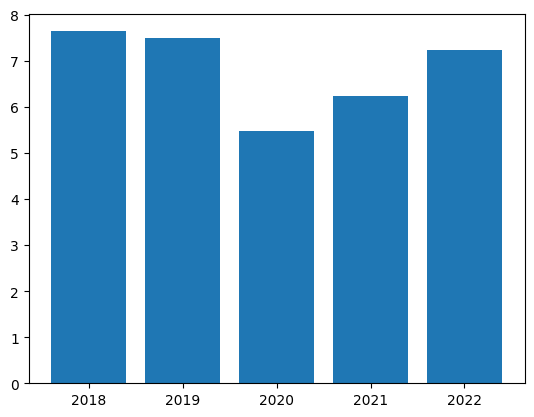

In [136]:
# Median percentage of transportantion expenses over total expenses
transpExpense = []
totalExpense_perc = []
for year in df_dict_keys:
    expensesTransp = dict_df_popExpenses_all[year][transport_codes].sum(axis=1) # Get sum all transp. expenses
    expensesTrransp_yearly = expensesTransp.sum() # get yearly spending
    percentage_s = (expensesTransp / dict_df_popExpenses_all[year]['GASTOMON']) * 100 # Get % on total expenses
    percentage_ = percentage_s.median() # Get median of population percentages 
    transpExpense.append(expensesTrransp_yearly)
    totalExpense_perc.append(percentage_)
plt.bar(df_dict_keys, totalExpense_perc );

In [149]:
for i, year in enumerate(df_dict_keys):
    print(f'The % of spendings dedicated to transportation in {year} was: {totalExpense_perc[i]:,}')

The % of spending dedicated to transportation in 2018 was: 7.636242120168689
The % of spending dedicated to transportation in 2019 was: 7.492721684701656
The % of spending dedicated to transportation in 2020 was: 5.462800474043646
The % of spending dedicated to transportation in 2021 was: 6.230536823507602
The % of spending dedicated to transportation in 2022 was: 7.223984438352339


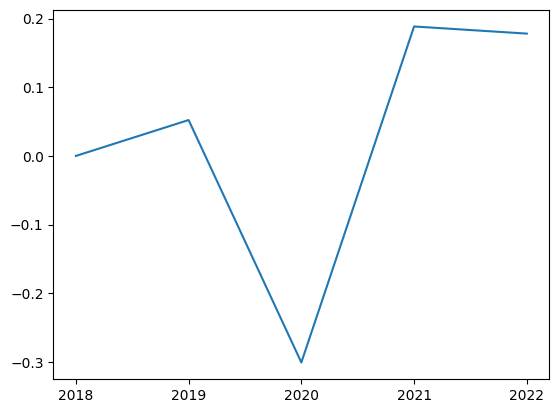

In [137]:
# Plot year on year change on transportation expenditures
relative_change = [0.0]
for i, yearExpense in enumerate(transpExpense):
    if i > 0:
        change = (transpExpense[i] - transpExpense[i-1]) / transpExpense[i-1]
        relative_change.append(change)

# Plot year on year change
plt.plot(df_dict_keys, relative_change);

> This plot shows the relative increasing and decreasing changes in the last years.

**Totals Comparison**

In [144]:
for i, year in enumerate(df_dict_keys):
    print(f'The total transportation spenging in Spain in {year} was: {transpExpense[i]:,}')

The total transportation spenging in Spain in 2018 was: 52,963,632,206.29
The total transportation spenging in Spain in 2019 was: 55,731,225,153.48
The total transportation spenging in Spain in 2020 was: 38,970,845,524.2
The total transportation spenging in Spain in 2021 was: 46,315,809,619.68001
The total transportation spenging in Spain in 2022 was: 54,564,313,695.829994


Are residents or urban areas spending less?

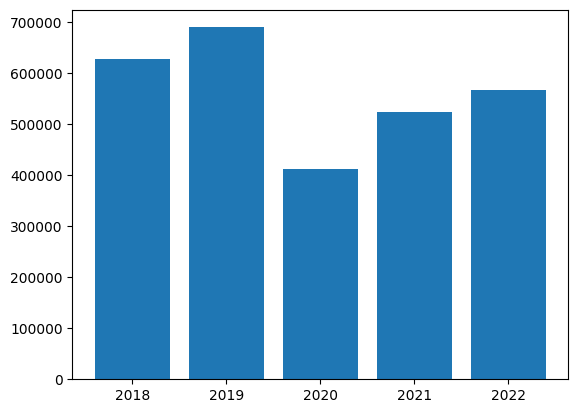

In [551]:
# Median percentage of transportantion expenses over total expenses
transpExpense_ = []
for year in df_dict_keys:
    expensesTransp_ = dict_df_HBS_urban[year][transport_codes].sum(axis=1)
    expensesTrransp_yearly_ = expensesTransp_.sum() # Get sum all transp. expenses
    transpExpense_.append(expensesTrransp_yearly_)
plt.bar(df_dict_keys, transpExpense_ );

Same as the rest of the nation, residents of urban areas were and are on a rising trend of transportation expenditures.

#### 2. _Are we spending more on cars?_  
**Have there been significant changes in private car ownership and usage in the last five years?**

The variables that could answer these questions are those related to the purchase of private vehicles. On the one hand it could be interesting to see if the ammount spent on purchasing new private cars has changed over the last 5 years. On the other hand, it could be interesting to look at spendings on traditional vs alternative fuels.
These purchases can also be affected by inflation and other economical factors but these will be not considered in this analysis.  

_2.1 Exploration of private car purchases_

This question was answered comparing the sample’s car purchases statistically and the total population purchases visually.

**Statistical Comparison**

The first step is to check if the variables are normally distributed.

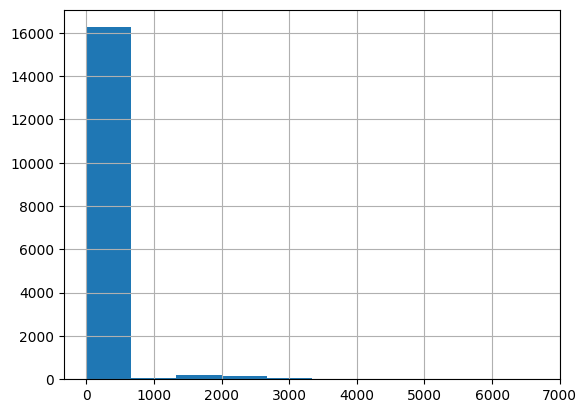

In [150]:
# Look at the distributio of the variable car purchase (code_07111)
dict_df_HBS['2022']['code_07111'].hist();

> Plots from different years and both car purchases (new and old) showed right skewed histograms.

The samples from different years will be compared testing the following hypothesis:  
H<sub>o</sub> = samples belongs to same population  
H<sub>1</sub> = samples do not belong to same population  

As the expenditures are not normally distributed (shown in the histogram) the test employed to check their differences is the H-test.  
`The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes.`

In [80]:
# Test car purchases
stats.kruskal(dict_df_HBS['2018']['code_07111']+ dict_df_HBS['2018']['code_07112'], 
              dict_df_HBS['2019']['code_07111']+ dict_df_HBS['2019']['code_07112'], 
              dict_df_HBS['2020']['code_07111']+ dict_df_HBS['2020']['code_07112'], 
              dict_df_HBS['2021']['code_07111']+ dict_df_HBS['2021']['code_07112'], 
              dict_df_HBS['2022']['code_07111']+ dict_df_HBS['2022']['code_07112'])

KruskalResult(statistic=125.07530002178086, pvalue=4.3981986118945517e-26)

>The output shows that the test statistic is 125.075 and the corresponding p-value is 4.3981986118945517e-26 (close to 0).  
>Since the p-value is less than 0.05, we reject the null hypothesis of the H test.  
The tests sugest differences in the purchases of cars over the years but these differences cannot be attributed to the arrival of new mobility ways.

**Visual inspection**

> All expenses and purchase of cars show left skewed distribution with the  majority of households from the sample not spending or spending little.

In [77]:
# Get total population expenditures using spatial weight and multiplying by 12
def GetExpenses(dict_:dict, years:list, codeList:list, Factor:str):
        '''
        INPUT: 
        dict_- Dictionary with DataFrames
        years - list of years to analize
        codeList - list with codes to be added
        Factor - spatial weight


        OUTPUT: 
        series expenses of anual expenses (multiplied by 12) 
        for whole population (multiplied by factor).
        '''
        # creation of series
        total_expenses_list = []
        for year in years:
                total_expense_year = 0
                if len(codeList) == 1:
                        anual_expense1 = (dict_[year][codeList[0]]* 12)*(
                                dict_[year][Factor])
                        total_expense_year = anual_expense1.sum()
                        total_expenses_list.append(total_expense_year)
                else:
                        for i in range(len(codeList)):
                                anual_expense1 = (dict_[year][codeList[i]]* 12)*(
                                        dict_[year][Factor])
                                total_expense_1 = anual_expense1.sum()
                                total_expense_year += total_expense_1
                        total_expenses_list.append(total_expense_year)
        print(total_expenses_list)
        colors = ['#7fc97f', '#beaed4', '#fdc086','#386cb0']
        plt.bar(years,total_expenses_list, color = random.choice(colors));
        return total_expenses_list

[21045368607.239998, 23105188648.899998, 17177735689.48, 18691055897.22, 19989635903.269997]


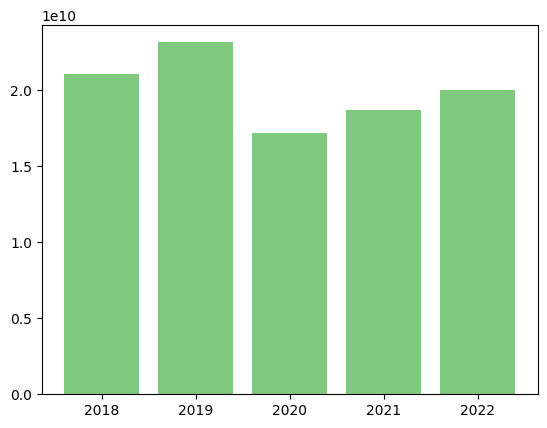

In [151]:
# Get total spending on car purchase for total population
code_list_car_purchase = ['code_07111', 'code_07112']
total_expenses_privateCar = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_car_purchase, 'FACTOR_y')

In [79]:
# Test function
expenses = dict_df_HBS_all_expenses['2018'][dict_df_HBS_all_expenses['2018']['CODIGO'] == '07111']
expenses_ = dict_df_HBS_all_expenses['2018'][dict_df_HBS_all_expenses['2018']['CODIGO'] == '07112']
x = expenses.GASTOMON.sum()
y = expenses_.GASTOMON.sum()
x+y

expenses = dict_df_HBS_all_expenses['2022'][dict_df_HBS_all_expenses['2022']['CODIGO'] == '07111']
expenses_ = dict_df_HBS_all_expenses['2022'][dict_df_HBS_all_expenses['2022']['CODIGO'] == '07112']
x = expenses.GASTOMON.sum()
y = expenses_.GASTOMON.sum()
x+y

19989635903.27

From the visual inspecion one cannot tell that expenditures on private cars are decreasing. On the contrary, the amount spent was rising before COVID-19 dropped then and now are on another raising trend. It is true that this displays the amount spent not the number of cars purchased.

_2.2 Exploration of traditional alternative fuels spendings_

This question was answered comparing the trends and total spendings on traditional fuels and alternative fuels for the whole population.

**Visual inspection**

[23562759126.910004, 23852994414.940002, 16166396462.05, 20925365048.08, 27012945039.670002]


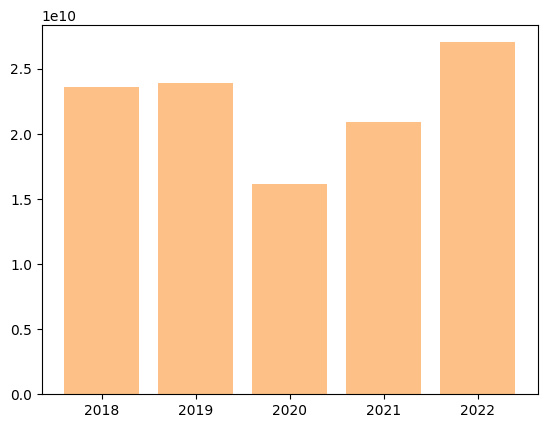

In [81]:
# Traditional fuel expenditure
code_list_fuel = ['code_07221', 'code_07222']
total_expenses_fuel = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_fuel, 'FACTOR_y')

> This plot shows the same trends seen before rising trend before and after COVID-19 but different in magnitudes. In this case the total spent in fuel in 2018 and 2019 were quite similar.

[17491495.34, 14587018.91, 33094679.630000003, 34270898.09, 50878726.39]


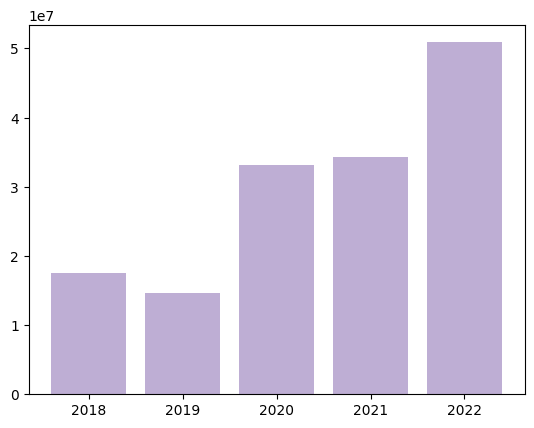

In [82]:
# Alternative fuels
code_list_alternative = ['code_07223']
total_expenses_altFuel = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_alternative, 'FACTOR_y')

This shows a different history. This plot shows an increase in the purchase of alternative fuels over the years.  
Inflation also plays a huge rol here.
It is important to notice that the fuel spending is around 1x10^<sup>10</sup> and alternative fuel spending 1x10<sup>7</sup> .

*1.3 Driving licences and private vehicle circulatory tax spendings*

**Visual inspection**

[873234738.3199999, 1002134778.8400002, 772427439.6199999, 1016163116.28, 951832964.51]


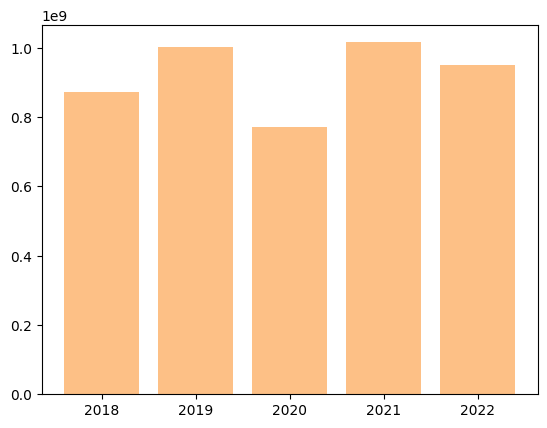

In [83]:
# Driving license 
code_list_driving = ['code_07244']
total_expenses_drivngLicence = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_driving, 'FACTOR_y')

This one shows rising tendency before covid then up in 2021 and could seem as if it was decreasing.

[640135606.5400001, 648682078.17, 626279699.26, 672186639.6999999, 705255389.7299999]


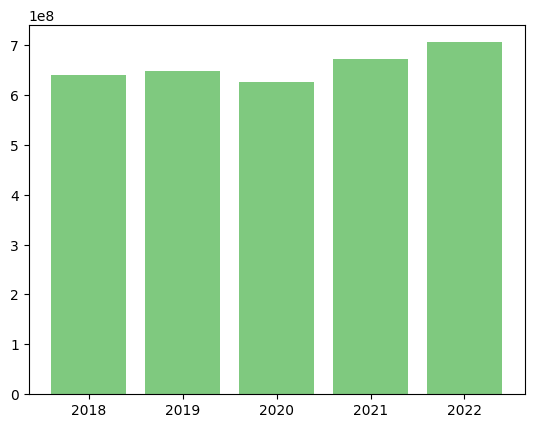

In [84]:
# Circulatory tax
code_list_ITV = ['code_07245']
total_expenses_ITV = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_ITV, 'FACTOR_y')

**Statistical Comparison**

In [85]:
# Test driving licences
stats.kruskal(dict_df_HBS['2018']['code_07244'], dict_df_HBS['2019']['code_07244'], dict_df_HBS['2020']['code_07244'], dict_df_HBS['2021']['code_07244'], dict_df_HBS['2022']['code_07244'])

KruskalResult(statistic=200.5711956453368, pvalue=2.8318219715746434e-42)

The output shows that the test statistic is 200.57 and the corresponding p-value is 7.56028150286148e-24 (close to 0).  
Since the p-value is less than .05, we reject the null hypothesis of the H test.  
The tests sugest differences in the obtention of driving licenses over the years but these differences cannot be attributed to the arrival of new mobility ways.

*1.4 Has the share on incompe spent on owning and runing motor vehicles changed over the years?*

Now the percentage of income spent on owning and running motor vehicles will be obtained.

In [73]:

# plot share of income spent on car usage

def scatter_plot(dict_df, year):
# set bench values
    transport_expenditure = 15 # 15% of total income spent in transportation
    median_income = dict_df[year]['IMPEXAC'].median()


    #variables
    x = dict_df[year]['IMPEXAC']
    y = dict_df[year]['percentage_income']

    dict_x_conditions = [x.where(x < median_income), 
                        x.where(x > median_income),
                        x.where(x < median_income),
                        x.where(x > median_income)
                    ]

    dict_y_conditions = [y.where(y < transport_expenditure), 
                    y.where(y < transport_expenditure),
                    y.where(y > transport_expenditure),
                    y.where(y > transport_expenditure)
                    ]
    fig, ax = plt.subplots()

    colors = ['#fd8d3c', '#fecc5c', '#2c7fb8', '#253494']
    legend_ = ['Low Income, Low Costs',
            'Higher Income, Low Costs',
            'Low Income, High Costs',
            'Higher Income, High Costs'
            ]
    s = 10

    # Plot
    for i in range(len(colors)):
                            ax.scatter(dict_x_conditions[i], 
                            dict_y_conditions[i], 
                            s = s,
                            c = colors[i], 
                            alpha = .3)

    # Benchmark Mean values          
    ax.axhline(y = transport_expenditure, color = 'red', linewidth=1)           
    ax.axvline(x = median_income, color = 'red', linewidth = 1);

    ax.legend(legend_)
    plt.title(year)
    plt.show()
    return plt

In [68]:
# Create car mobility variable
for year in df_dict_keys:
    dict_df_HBS[year]['carMobility'] = dict_df_HBS[year]['code_07111'] 
    + dict_df_HBS[year]['code_07112'] + dict_df_HBS[year]['code_07221']
    + dict_df_HBS[year]['code_07222']

In [69]:
# Look at basic statistics for private car mobility
dict_df_HBS[year]['carMobility'].describe()

count    16809.000000
mean        69.294156
std        401.937896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6666.666667
Name: carMobility, dtype: float64

In [70]:
# Look at basic income statistics 
dict_df_HBS[year]['IMPEXAC'].describe()

count    16809.000000
mean      2553.049259
std       1413.327925
min          0.000000
25%       1643.000000
50%       2298.000000
75%       3218.000000
max      15873.000000
Name: IMPEXAC, dtype: float64

In [72]:
# Get share of income spent on 'owning and running motor vehicles'
income_percentage = []
for year in df_dict_keys:
    dict_df_HBS[year].loc[:,'percentage_income'] = (dict_df_HBS[year]['carMobility'] * 100) \
                                                    / dict_df_HBS[year]['IMPEXAC']

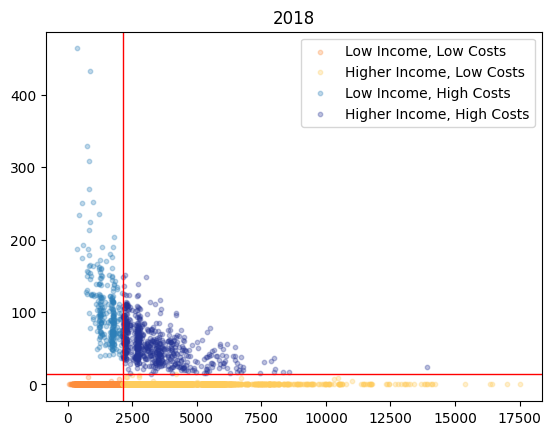

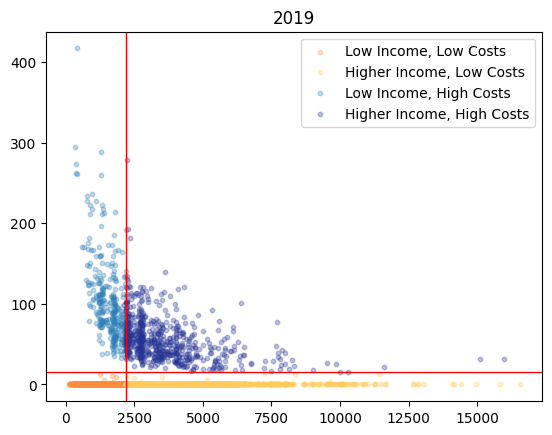

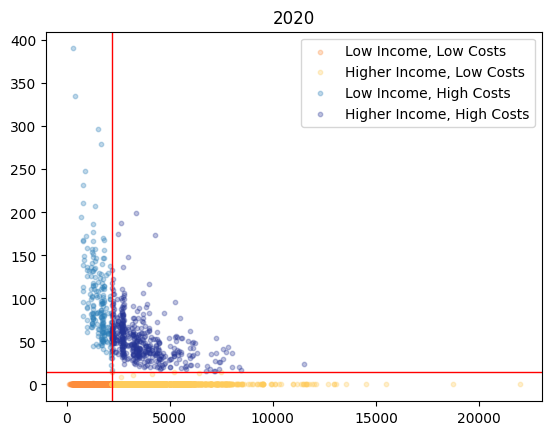

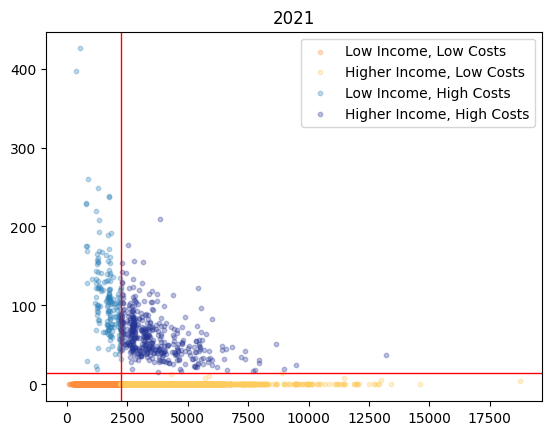

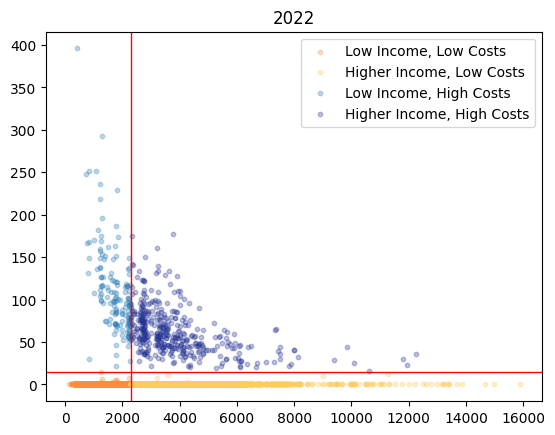

In [74]:
#plot
for year in df_dict_keys:
    scatter_plot(dict_df_HBS, year)


#### 2. Are Personal Mobility Vehicles purchases on a rise?

_2.1 Exploration of personal mobility vehicles purchases_

**Visual inspection**

[1086993492.8500001, 1676430003.53, 1211877694.85, 1473865811.06, 1551879649.73]


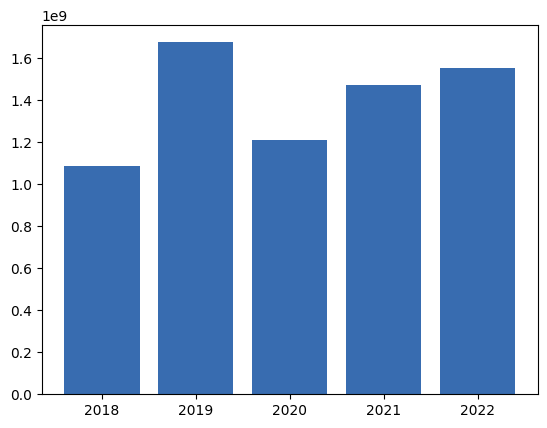

In [86]:
# Plot personal mobility purchases
code_list_PMV = ['code_07120', 'code_07130']
total_expenses_PMV = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PMV, 'FACTOR_y')

Personal mobility vehicles display also the same tendencies: steep rising trend before 2020. Fall in 2020 and another rising period since COVID-19. The steep rise in the purchases of PTV from 2018 to 2019 seems proportionaly higher than the steep increase in car purchases from 2018 to 2019.

#### 3. Are combined public transportation tickets and shared options on the rise?

_3.1 Exploration of public transportation individual and combined tickets_

[1203363424.53, 1138884456.42, 552074697.21, 645311742.3, 749966903.99]


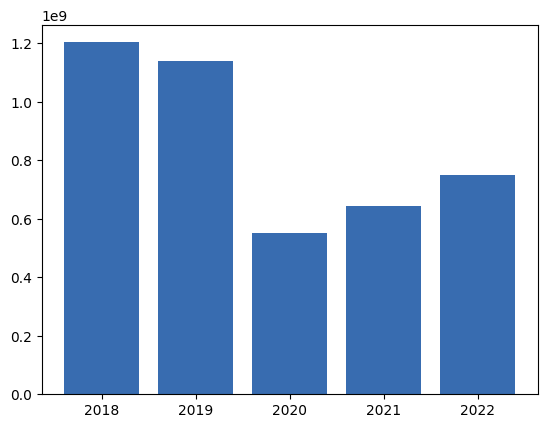

In [87]:
# Plot public transportation spendings (individual usage)
code_list_PT = ['code_07311', 'code_07313', 'code_07321']
total_expenses_urbanPT = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PT, 'FACTOR_y')

[483198277.36, 493270226.8, 227503469.82999998, 275975219.15, 349595938.34000003]


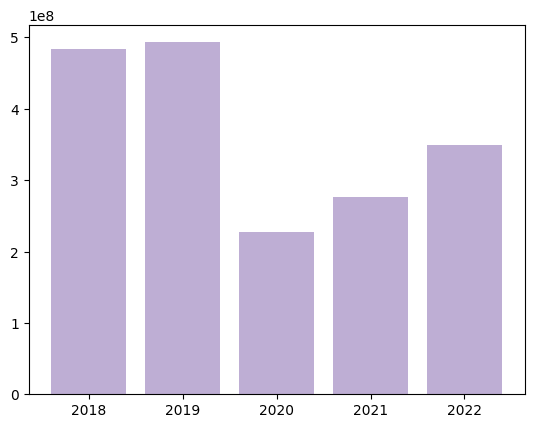

In [88]:
# Plot public transportation spendings (combined usage)
code_list_cPT = ['code_07322']
total_expenses_combinedPT = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_cPT, 'FACTOR_y')

_3.2 Exploratin of shared mobility options expenditures_

[721998117.8100001, 707370371.39, 424022576.96, 512416811.13, 577938142.9399999]


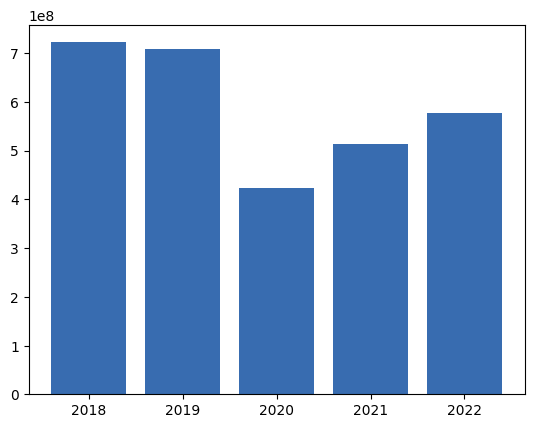

In [89]:
# Plot shared mobility expenditures
code_list_Shared = ['code_07324']
total_expenses_sharedMobility = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_Shared, 'FACTOR_y')

#### 4. What variables correlate well with car-oriented mobility?

This question requires the definition of car-oriented mobility in a response variables. The variables selected as descriptive of this are car purchases (old or new) and car usage (oil spending). These variables are going to be the response and others as the explanatory variables. The columns of interest need to bee selected and inspected.

In [90]:
# Look at dataframe's shape
for year in df_dict_keys:
    print(dict_df_HBS['2019'].shape)

(17527, 38)
(17527, 38)
(17527, 38)
(17527, 38)
(17527, 38)


In [91]:
dict_df_HBS['2019'].percentage_income.describe()

count    17463.0
mean         inf
std          NaN
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          inf
Name: percentage_income, dtype: float64

The dataframes have 35 columns each, as seen previously. All of them are stored as quantitative but some make no sense or are not stored in the right way. For instance 'NUMERO' is just the family ID and 'FACTOR' the spatial weight. The ones starting with *code_* are expenses, year is a date variable and so on. 

ValueError: supplied range of [0.0, inf] is not finite

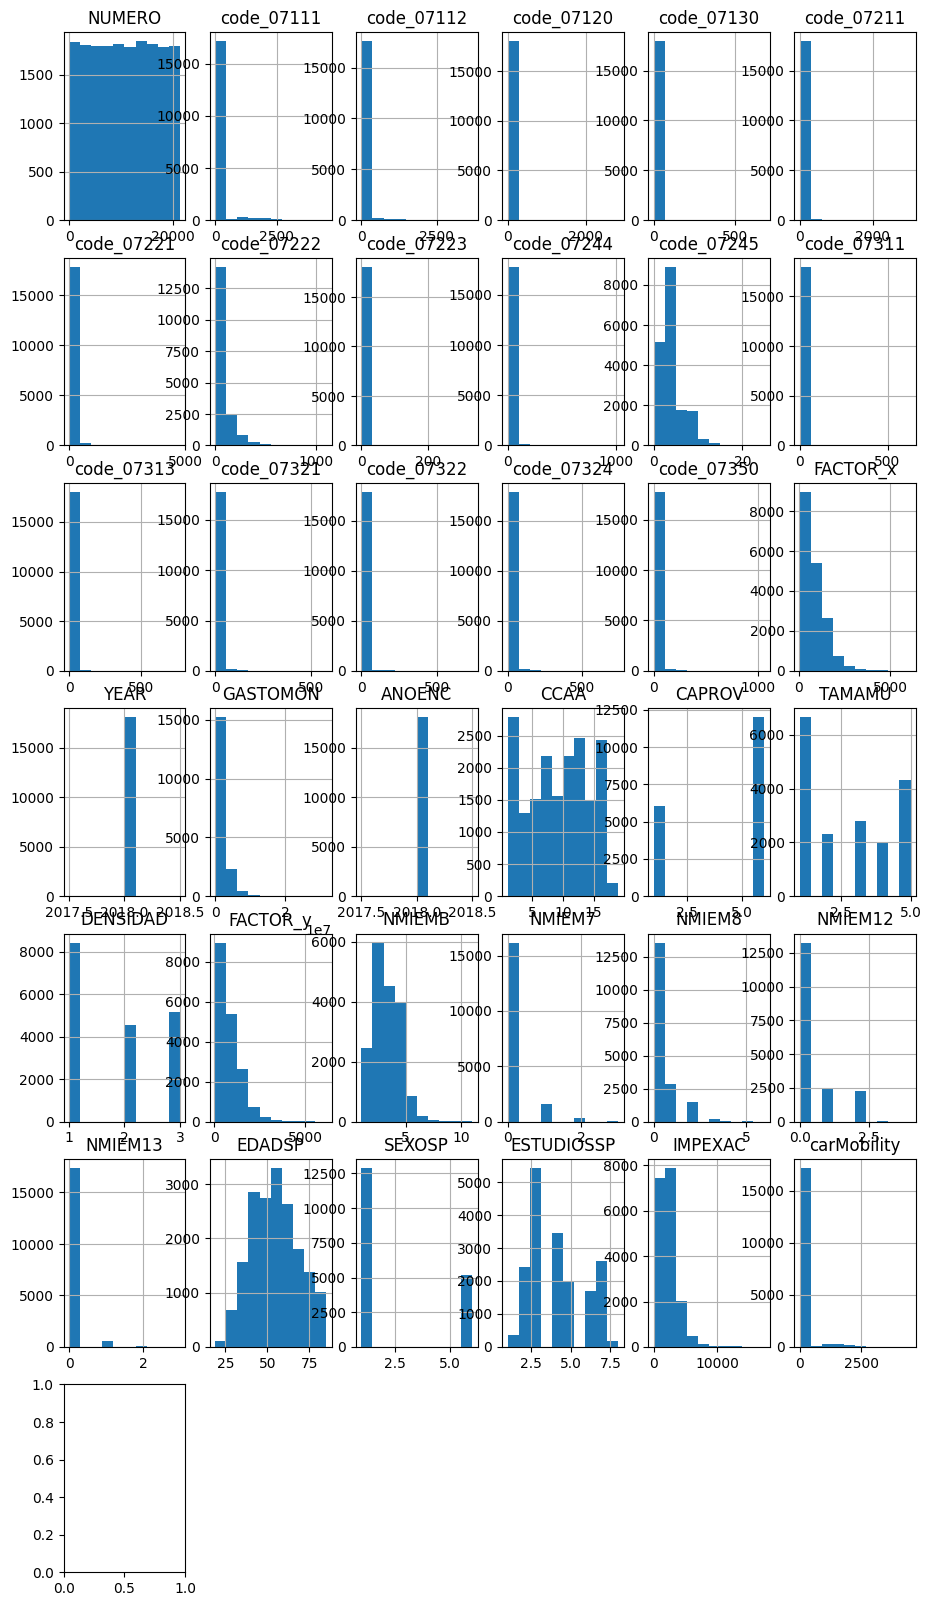

In [92]:
# Look at histograms
dict_df_HBS['2018'].hist(figsize = (11,20));

The variables selected as response were the expenditures on new or old cars and fuel expenditure (this variable was defined earlier as _carMobility_). Other variables like driving's licence do not necesarily mean that the household owns a car.

> The variables selected for the study will be saved in a new dataframe too create a correlation matrix.

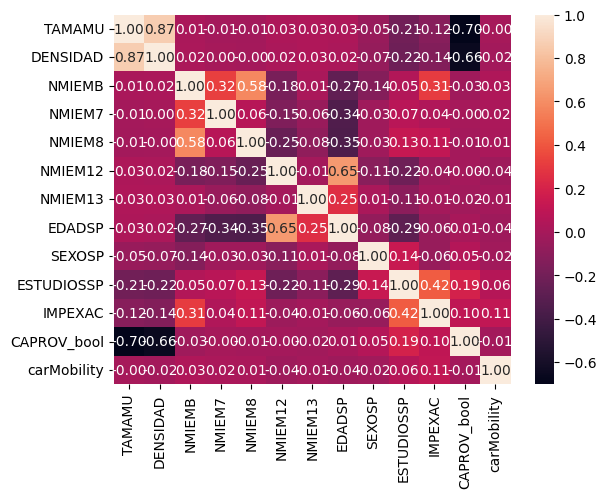

In [93]:
# Look at correlation matrix
x = dict_df_HBS['2020'].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'CAPROV_bool', 'carMobility']]

sns.heatmap(x.corr(), annot=True, fmt=".2f");

> None of the selected variables show great correlation with car expenditures.

The model applied will be a linear regresion considering the data to be cross-sectional. This means one model per year.

In [94]:
def split_fit_linearModel(control_X, response_y, test_size=.3, rand_state=42):

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = .30, random_state=42)

    # Fit model
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)

    # Predict  model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    # Score model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    # Get error
    squared_error_ = mean_squared_error(y_test, y_test_preds)

    print(f'The test score is {test_score} and the train score is {train_score}')
    return test_score, train_score

In [95]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_HBS[year].loc[:,'carMobility']
    X = dict_df_HBS[year].loc[:,['TAMAMU', 'DENSIDAD',
                                'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                'IMPEXAC', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)

The test score is 0.009852418443656252 and the train score is 0.014293129251208847
The test score is 0.02116317180187821 and the train score is 0.020115090849379236
The test score is 0.00833868982912056 and the train score is 0.015841770345013106
The test score is 0.010633392906327255 and the train score is 0.010264331232879176
The test score is 0.014795660077992823 and the train score is 0.014741262915022646


> Seems like these variables explain very little of the reasons behind private car-based mobility.

Revising the literature on the subject it seems like mixing car purchases and car fuel expenditure is rarely done [referncias]; the first thing to help this model is to separate car purchases from fuel spending and model the second.  
Aditionaly the relationship with the expenditure is modeled as logarithmic. This means salary values have to be over 0.

In [96]:
# Modify response variable
for year in df_dict_keys:
    dict_df_HBS[year]['df_fuelExpenditure'] = dict_df_HBS[year]['code_07221']
    + dict_df_HBS[year]['code_07222'] + dict_df_HBS[year]['code_07223']

In [97]:
# Select households with salary higher than 0
new_dfs = []
for year in df_dict_keys:
    df = dict_df_HBS[year].loc[dict_df_HBS[year]['IMPEXAC'] > 0]
    new_dfs.append(df)
dict_df_EPFSalaries = dict(zip(df_dict_keys, new_dfs))

In [98]:
for year in df_dict_keys:
    dict_df_EPFSalaries[year] = dict_df_EPFSalaries[year].copy()
    dict_df_EPFSalaries[year].loc[:,'log_netIncome'] = np.log(dict_df_EPFSalaries[year]['IMPEXAC'])

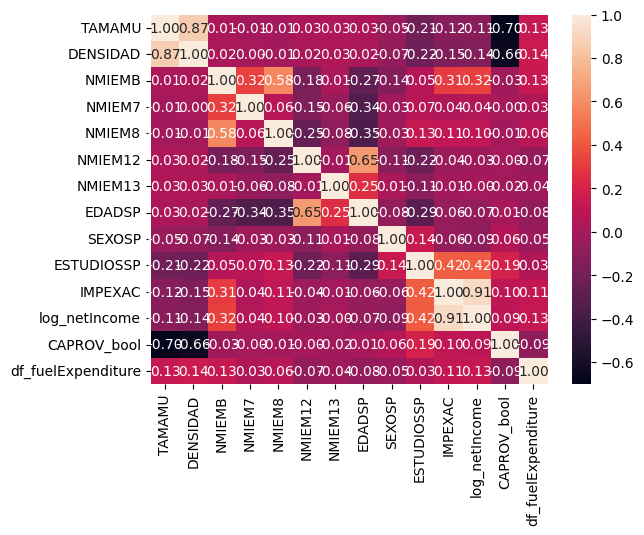

In [99]:
# Look at correlation matrix
df_ = dict_df_EPFSalaries['2020'].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'log_netIncome', 'CAPROV_bool', 'df_fuelExpenditure']]

sns.heatmap(df_.corr(), annot=True, fmt=".2f");

Seems like the income's logarithm indeed correlates better to fuel expenditure.

In [101]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPFSalaries[year].loc[:,'df_fuelExpenditure']
    X = dict_df_EPFSalaries[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'log_netIncome', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)


The test score is 0.05714560359820342 and the train score is 0.0839106103916335
The test score is 0.08438370565944497 and the train score is 0.08111048516652175
The test score is 0.057519395629012315 and the train score is 0.055883186957150555
The test score is 0.04626919237436522 and the train score is 0.052175535844212195
The test score is 0.051241952643617084 and the train score is 0.05074876633076897


With these changes we are able to explain up to a 8.4% of the variability in household fuel expenditures. The model prediction is not good but seems like there is no overfitting. Perhaps changing the equation could improve the equation or adding other relevant variables. In this case the prediction will be left as this and will not be included in the final report.

In [102]:
# Modify response variable to be fuel expenditure's natural log
new_dfs_log_Fuel = []
for year in df_dict_keys:
    df = dict_df_HBS[year].loc[dict_df_HBS[year]['df_fuelExpenditure'] > 0]
    new_dfs_log_Fuel.append(df)
dict_df_EPF_logExpenditures = dict(zip(df_dict_keys, new_dfs_log_Fuel))

In [103]:
for year in df_dict_keys:
    dict_df_EPF_logExpenditures[year] = dict_df_EPF_logExpenditures[year].copy()
    dict_df_EPF_logExpenditures[year]['df_log_fuelExpenditure'] = np.log(
        dict_df_EPF_logExpenditures[year]['df_fuelExpenditure'])

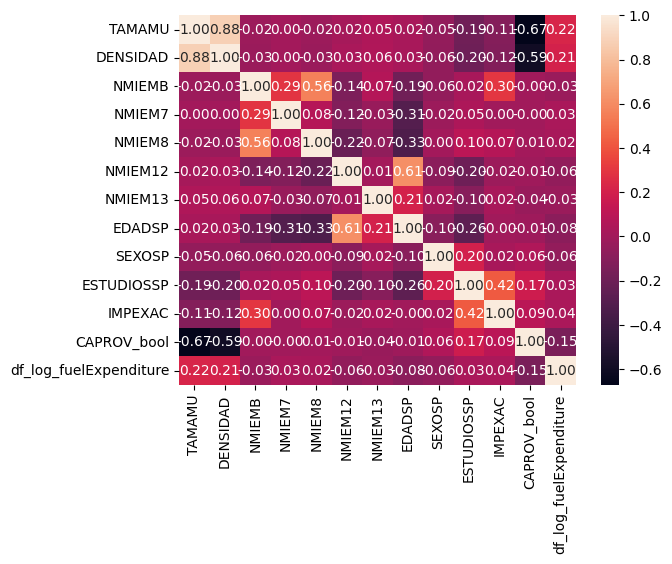

In [105]:
# Look at correlation matrix
x = dict_df_EPF_logExpenditures[year].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'CAPROV_bool', 'df_log_fuelExpenditure']]

sns.heatmap(x.corr(), annot=True, fmt=".2f");

> Some variables' influence on the response have increased with the modification.

In [107]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPF_logExpenditures[year].loc[:,'df_log_fuelExpenditure']
    X = dict_df_EPF_logExpenditures[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'IMPEXAC', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)

The test score is 0.07447394630485393 and the train score is 0.08528358273823078
The test score is 0.06988939657093862 and the train score is 0.08438273421186826
The test score is 0.050551353238382 and the train score is 0.06923160657866945
The test score is 0.07220255700952827 and the train score is 0.06681300057459683
The test score is 0.08085095914304852 and the train score is 0.0671838202178


That did not substantially improved the model. One last try will use the Salary's log to try to infer the fuel expenditure's log.

In [129]:
# Modify explanatory variable 'Salary' to be its natural log
new_dfs_loglog = []
for year in df_dict_keys:
    df = dict_df_HBS[year].loc[(dict_df_HBS[year]['IMPEXAC'] > 0) & (
        dict_df_HBS[year]['df_fuelExpenditure'] > 1)]
    new_dfs_loglog.append(df)
dict_df_EPF_loglog = dict(zip(df_dict_keys, new_dfs_loglog))

In [131]:
# Define new response
for year in df_dict_keys:
    dict_df_EPF_loglog[year] = dict_df_EPF_loglog[year].copy()
    dict_df_EPF_loglog[year]['df_log_fuelExpenditure'] = np.log(
        dict_df_EPF_loglog[year]['df_fuelExpenditure'])

In [132]:
# Modify new explanatory variable
for year in df_dict_keys:
    dict_df_EPF_loglog[year] = dict_df_EPF_loglog[year].copy()
    dict_df_EPF_loglog[year]['df_log_salary'] = np.log(
        dict_df_EPF_loglog[year]['IMPEXAC'])

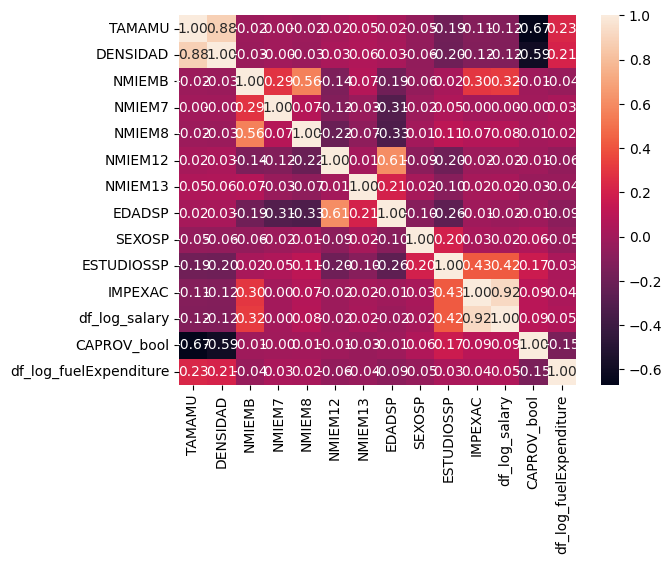

In [134]:
# Look at correlation matrix
x = dict_df_EPF_loglog[year].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'df_log_salary', 'CAPROV_bool', 'df_log_fuelExpenditure']]

sns.heatmap(x.corr(), annot=True, fmt=".2f");

> Seems like the response variable is more correlated to the salary's log than the original variable.

> 

In [135]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPF_loglog[year].loc[:,'df_log_fuelExpenditure']
    X = dict_df_EPF_loglog[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'df_log_salary', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)

The test score is 0.09497324102305227 and the train score is 0.08548241552041003
The test score is 0.09085410536538263 and the train score is 0.09464610585677624
The test score is 0.06140045213297085 and the train score is 0.07497095153412159
The test score is 0.08866333902784718 and the train score is 0.068868364359849
The test score is 0.07422843960949155 and the train score is 0.08630894042210735


> This has improved the prediction by a point.

<a id='result'></a>
## 5. Result Evaluation

The results obtained will be separated by research questions.

_1. Have there been significant changes in private car ownership in the last five years?_

The explorations made aiming to answer this question were related to private car purchases and fuel spendings. In adition to that the aquisition of driving licenses and circulatory tax spendings 

<a id='conclusions'></a>
## 6. Conclusions

<a id='Refere'></a>
## 7. References